In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random

In [2]:
a = 2
b = 2
c = 3/4
d = 4
e = 2
f = 3
m = 1/3

In [3]:
def fun1():
  df = pd.DataFrame(columns = ['x', 'y'])
  x = np.array([random.uniform(0, 15) for i in range(100)])
  df['x'] = x
  df['y'] = np.array([m*x[i] + b for i in range(len(x))])
  return df

def fun2():
  df = pd.DataFrame(columns = ['x', 'y'])
  x = np.array([random.uniform(0, np.pi) for i in range(100)])
  df['x'] = x
  df['y'] = np.array([a*np.cos(b*x[i]) + c*np.sin(d*x[i]) + e  for i in range(len(x))])
  return df

def fun3():
  df = pd.DataFrame(columns = ['x', 'y'])
  x = np.array([random.uniform(0, np.pi) for i in range(100)])
  df['x'] = x
  df['y'] = np.array([a*np.exp(b*x[i])*np.cos(c*x[i]) + d*np.exp(e*x[i])*np.sin(f*x[i])  for i in range(len(x))])
  return df
  
def fun4():
  df = pd.DataFrame(columns = ['x', 'y'])
  x = np.array([random.uniform(0, np.pi) for i in range(100)])
  df['x'] = x
  df['y'] = np.array([a*np.sin(b*x[i]) + c*np.cos(d*x[i]) + e  for i in range(len(x))])
  return df

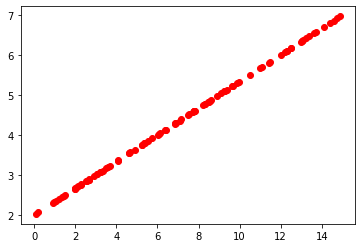

In [51]:
df1 = fun1()
plt.scatter(df1['x'], df1['y'], color='red')
df2 = fun2()
plt.scatter(df2['x'], df2['y'], color='green')
df3 = fun3()
plt.scatter(df3['x'], df3['y'], color='blue')
df4 = fun4()
plt.scatter(df4['x'], df4['y'], color='yellow')

plt.show()

In [5]:
def normalize(df):
  for col in df:
    max = df[str(col)].max()
    min = df[str(col)].min()
    df[str(col)] = (df[str(col)] - min)/(max-min)
  return df

In [57]:
def polynomial_regression(fun, k):
  df = normalize(fun())
  X_train, X_test, Y_train, Y_test = train_test_split(df['x'], df['y'], test_size=0.25, random_state = 0)
  weights = np.array([0 for i in range(k+1)], dtype='float32')
  learning_rate = 0.1
  epochs = 1000
  for epoch in range(epochs):
    Y_pred = np.dot(weights, [(X_train**i) for i in range(len(weights))])
    for i in range(len(weights)):
      weights[i] -= learning_rate*((-2/len(X_train))*np.sum((Y_train - Y_pred)*(X_train**i)) + 0.01*np.sum(weights))
  
  Y_Pred = np.dot(weights, [(X_test**i) for i in range(len(weights))])
  plt.scatter(X_test, Y_Pred, color='g', label='Predictions')
  plt.scatter(X_test, Y_test, color='b', label='Real')
  plt.legend()
  plt.show()
  return weights


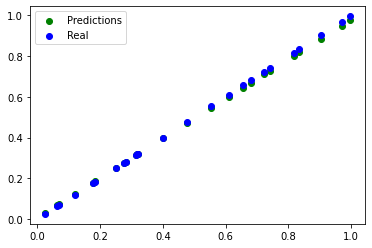

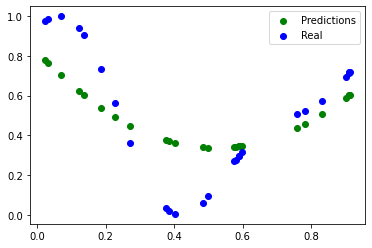

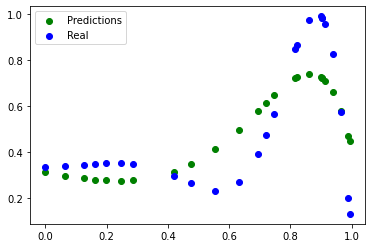

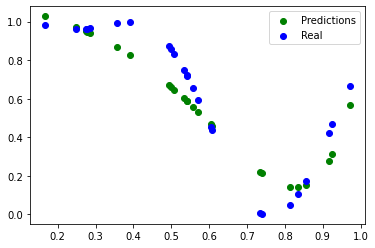

In [63]:
weights = polynomial_regression(fun1, 1)
weights = polynomial_regression(fun2, 2)
weights = polynomial_regression(fun3, 9)
weights = polynomial_regression(fun4, 9)